In [1]:
#All necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [111]:
#import dataset
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
data_org = df.copy()

## Exploratory data analysis

Agenda:

1) Explore data and data types

2) Check NaN values

3) Check anamolies

4) Identify relation b/w variables

5) Check distribtions

6) check if data is imbalanced

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
#shape of dataset
df.shape

(5110, 12)

In [5]:
#Description of attributes
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
#data types
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [7]:
#check null values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

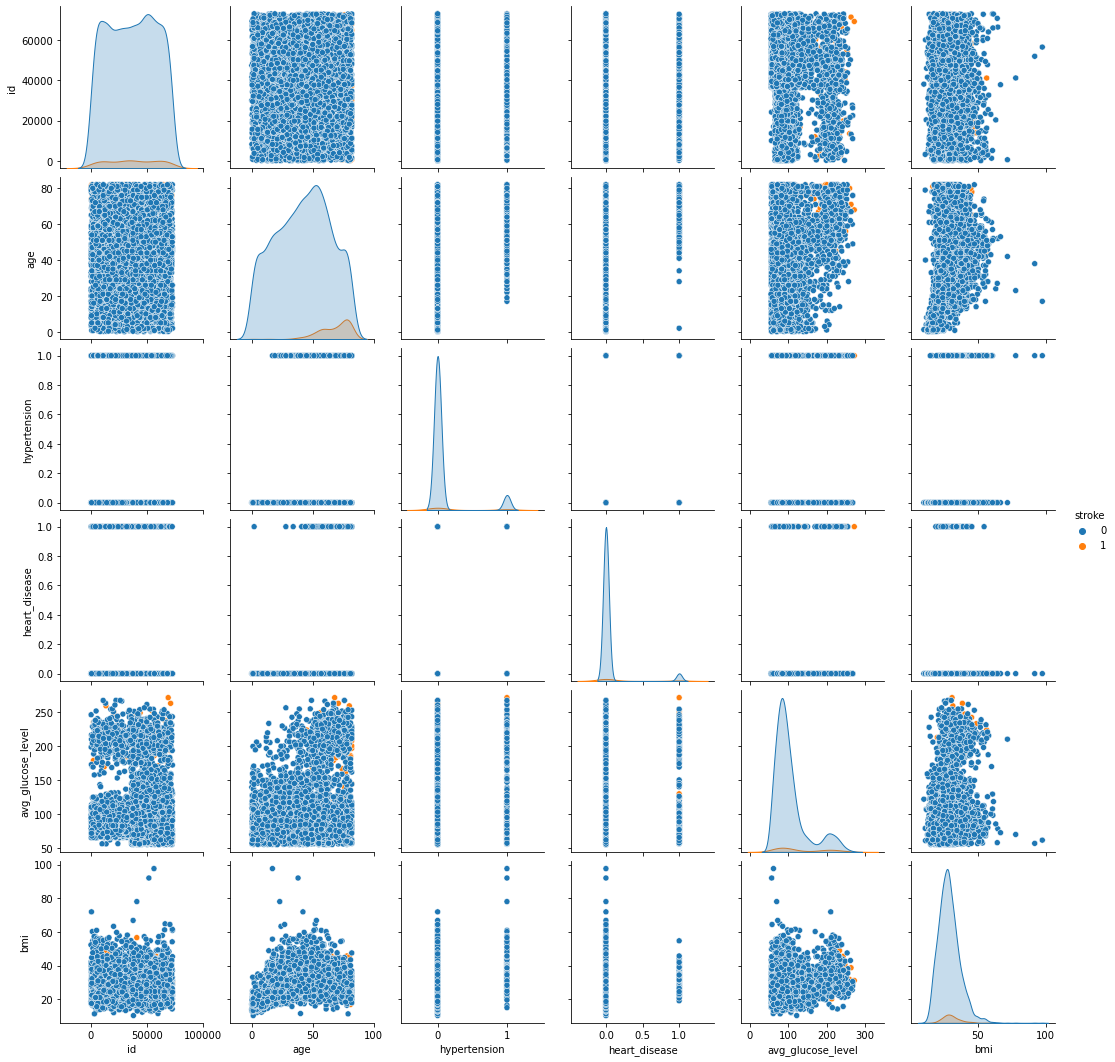

In [8]:
#Quick relation check b/w all variables
sns.pairplot(df,hue="stroke")

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='count'>

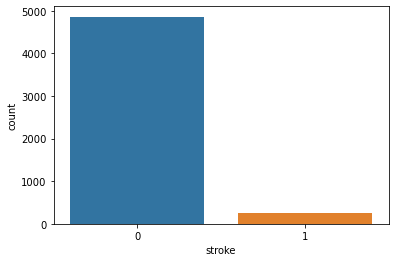

In [9]:
#check labels frequency in dependent variable
sns.countplot(df.stroke)

By above countplot, dataset is purely imbalanced.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoking_status', ylabel='count'>

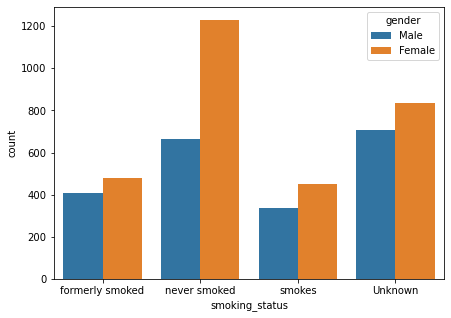

In [179]:
plt.figure(figsize=(7,5))
sns.countplot(df["smoking_status"],hue=df["gender"]) 

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='work_type', ylabel='count'>

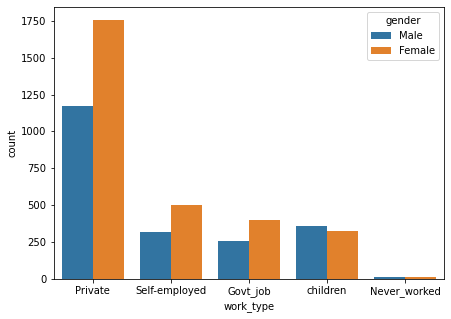

In [182]:
plt.figure(figsize=(7,5))
sns.countplot(df["work_type"],hue=df["gender"])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='count'>

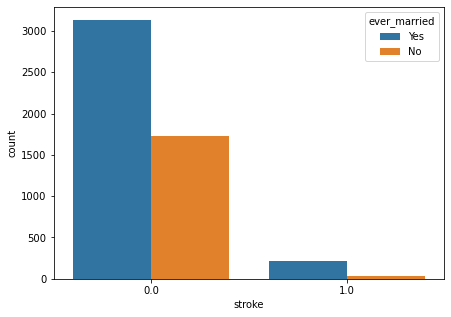

In [211]:
plt.figure(figsize=(7,5))
sns.countplot(df["stroke"],hue=df["ever_married"]) 

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='count'>

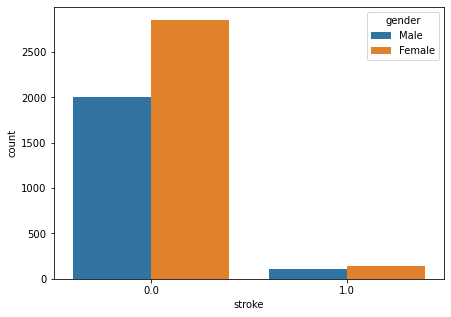

In [180]:
plt.figure(figsize=(7,5))
sns.countplot(df["stroke"],hue=df["gender"]) 

In [10]:
#categorical and numerical variables
categorical_variables = [column for column in df.columns if df[column].dtype=="O"]
numerical_variables = [column for column in df.columns if df[column].dtype!="O"]

In [11]:
#function to display all unique values with count for all categorical variables
def unique_value_displayer(columns,data):
    counter = 0
    for column in columns:
        counter += 1
        if counter!=len(columns):
            print("{} - Unique Values with their count".format(column))
            print(" ")
            print(data[column].value_counts())
            print(" ")
            print("===============================================")
            print(" ")
        else:
            print("{} - Unique Values with their count".format(column))
            print(" ")
            print(data[column].value_counts())

In [12]:
unique_value_displayer(categorical_variables,df)

gender - Unique Values with their count
 
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
 
 
ever_married - Unique Values with their count
 
Yes    3353
No     1757
Name: ever_married, dtype: int64
 
 
work_type - Unique Values with their count
 
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
 
 
Residence_type - Unique Values with their count
 
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
 
 
smoking_status - Unique Values with their count
 
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


<AxesSubplot:>

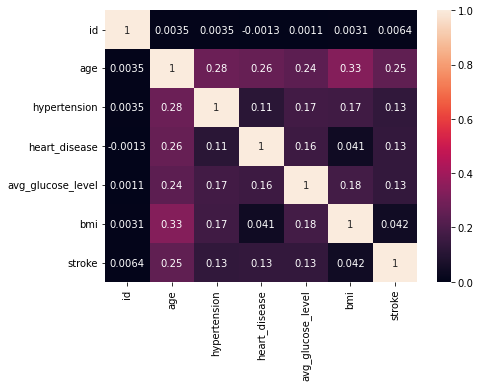

In [107]:
#to check quick correlation using heatmap
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),annot=True)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Age Vs BMI')

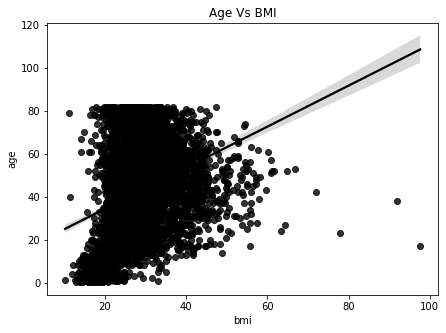

In [96]:
#Correlation check
plt.figure(figsize=(7,5))
sns.regplot(df["bmi"],df["age"],color="black")
plt.title("Age Vs BMI")

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Age Vs avg_glucose_level')

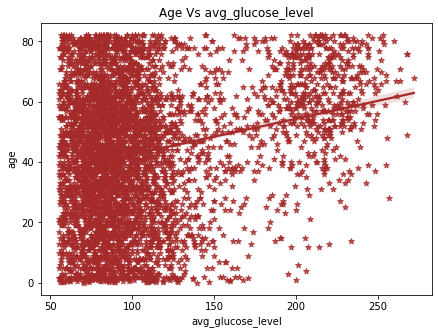

In [100]:
plt.figure(figsize=(7,5))
sns.regplot(df["avg_glucose_level"],df["age"],marker="*",color="brown")
plt.title("Age Vs avg_glucose_level")

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'BMI Vs avg_glucose_level')

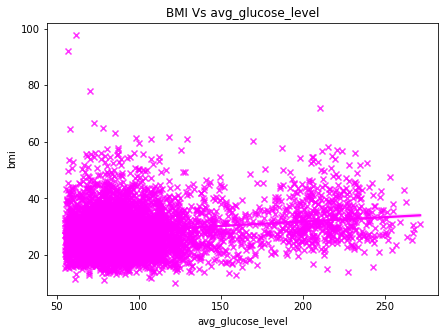

In [106]:
plt.figure(figsize=(7,5))
sns.regplot(df["avg_glucose_level"],df["bmi"],color="magenta",marker="x")
plt.title("BMI Vs avg_glucose_level")

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_glucose_level'>

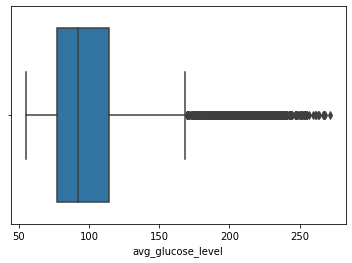

In [14]:
#Outliers check through visualization
sns.boxplot(df["avg_glucose_level"])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_glucose_level'>

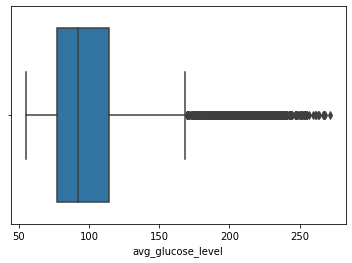

In [101]:
#Outliers check through visualization
sns.boxplot(df["avg_glucose_level"])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

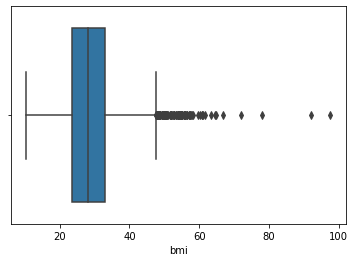

In [15]:
sns.boxplot(df["bmi"])

BMI and avg_glucose_level variables containes outliers to be handled.

In [74]:
#Detecting outliers function using IQR
def anamolies_detector(column,data):
    col = df[column].sort_values(ascending=True)
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_boundary = Q1 - (1.5 * IQR)
    upper_boundary = Q3 + (1.5 * IQR)
    print("lower_boundary : ",lower_boundary)
    print("upper_boundary : ",upper_boundary)
    df1 = data[(data[column]<lower_boundary)|(data[column]>upper_boundary)]
    return df1

In [75]:
#Outliers in "avg_glucose_level" using IQR
df1 = anamolies_detector("avg_glucose_level",df)
print("")
print("min : ",df1["avg_glucose_level"].min())
print("max : ",df1["avg_glucose_level"].max())
print("mean : ",df1["avg_glucose_level"].mean())

lower_boundary :  21.977500000000006
upper_boundary :  169.35750000000002

min :  169.43
max :  271.74
mean :  211.34159489633169


In [76]:
#Outliers in "bmi" using IQR
df1 = anamolies_detector("bmi",df)
print("")
print("min : ",df1["bmi"].min())
print("max : ",df1["bmi"].max())
print("mean : ",df1["bmi"].mean())

lower_boundary :  9.099999999999998
upper_boundary :  47.5

min :  47.6
max :  97.6
mean :  54.18181818181819


Text(0, 0.5, 'Average glucose level')

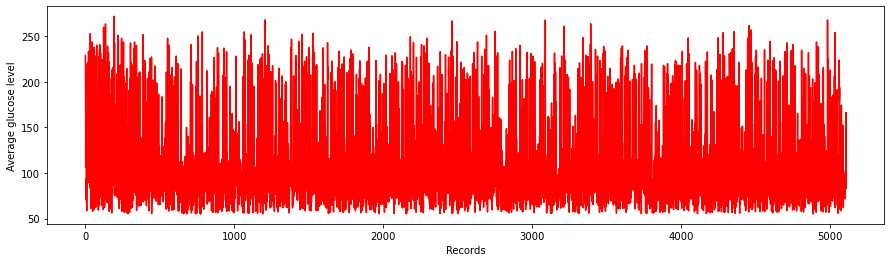

In [81]:
#Outliers check using plot
df["avg_glucose_level"].plot(figsize=(15,4),color="red")
plt.xlabel("Records")
plt.ylabel("Average glucose level")

--> The spikes doesn't looks like an outliers in the above graph, but are occuring in a certain intervels.

--> Hence, avg_glucose_level doesn't require outlier treatment.

Text(0, 0.5, 'BMI')

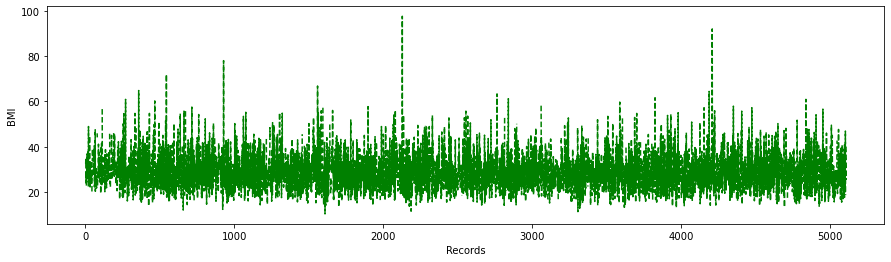

In [84]:
df["bmi"].plot(figsize=(15,4),color="green",ls="--")
plt.xlabel("Records")
plt.ylabel("BMI")

--> "BMI" variable requires outliers as spikes not occuring consistently or in harmony.

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

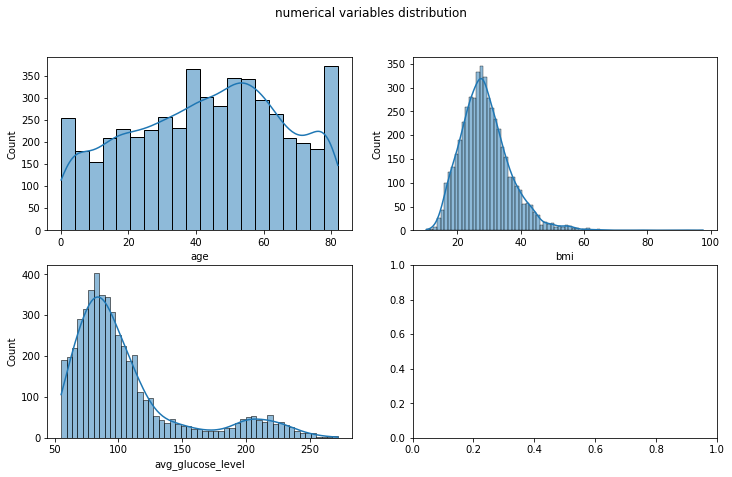

In [24]:
#Outliers check using distributions
fig,ax = plt.subplots(2,2,figsize=(12,7))
plt.suptitle("numerical variables distribution")
plt.subplot(2,2,1)
sns.histplot(df["age"],kde=True)
plt.subplot(2,2,2)
sns.histplot(df["bmi"],kde=True)
plt.subplot(2,2,3)
sns.histplot(df["avg_glucose_level"],kde=True)

## Feature Engineering

Agenda:

1) Impute missing values

2) Detecting outliers

3) Handling categorical variables

4) Normalizing data

5) Handling imbalanced data


#### Handling Outliers

In [119]:
#imputing outliers in BMI variable
df.loc[df["bmi"]>60.9] = 60.9

<AxesSubplot:>

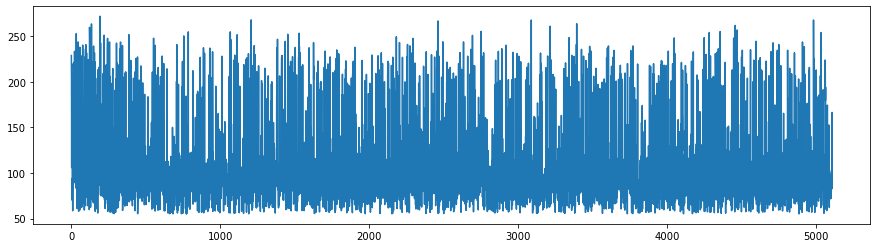

In [64]:
df["avg_glucose_level"].plot(figsize=(15,4))

Text(0, 0.5, 'BMI')

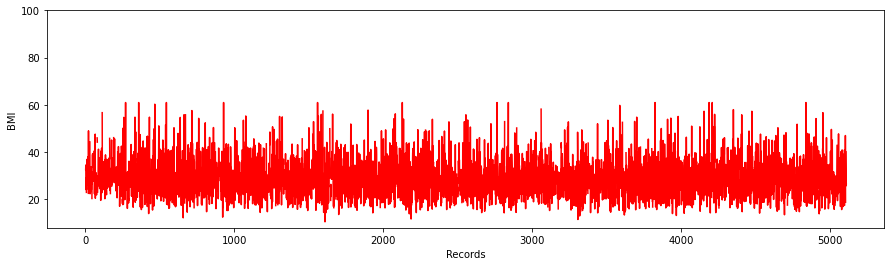

In [213]:
df["bmi"].plot(figsize=(15,4),color="red",yticks=[20,40,60,80,100])
plt.xlabel("Records")
plt.ylabel("BMI")

#### Handling categorical variables

In [129]:
categorical_variables

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [134]:
unique_value_displayer(["gender"],df)

gender - Unique Values with their count
 
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


In [135]:
df.loc[df["gender"]=="Other"] #There is only one record with gender as others, so will replace that with mode technique.

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156.0,Other,26.0,0.0,0.0,No,Private,Rural,143.33,22.4,formerly smoked,0.0


In [174]:
df.drop([3116],axis=0,inplace=True)
df.reset_index()
df.drop("index",axis=1,inplace=True)
df.shape

(5109, 12)

In [181]:
unique_value_displayer(["work_type"],df)

work_type - Unique Values with their count
 
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


In [204]:
def categorical_handler(column,data):
    data = pd.concat([data,pd.get_dummies(data[column],drop_first=True)],axis=1)
    return data

In [205]:
df = categorical_handler(["work_type"],df)

In [208]:
df = categorical_handler(["gender"],df)

In [209]:
unique_value_displayer(["ever_married"],df)

ever_married - Unique Values with their count
 
Yes    3353
No     1756
Name: ever_married, dtype: int64


In [210]:
df = categorical_handler(["ever_married"],df)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,gender_Male,ever_married_Yes
0,9046.0,Male,67.0,0.0,1.0,Yes,Private,Urban,228.69,36.6,formerly smoked,1.0,0,1,0,0,1,1
1,51676.0,Female,61.0,0.0,0.0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1.0,0,0,1,0,0,1
2,31112.0,Male,80.0,0.0,1.0,Yes,Private,Rural,105.92,32.5,never smoked,1.0,0,1,0,0,1,1
3,60182.0,Female,49.0,0.0,0.0,Yes,Private,Urban,171.23,34.4,smokes,1.0,0,1,0,0,0,1
4,1665.0,Female,79.0,1.0,0.0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1.0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234.0,Female,80.0,1.0,0.0,Yes,Private,Urban,83.75,NaN,never smoked,0.0,0,1,0,0,0,1
5106,44873.0,Female,81.0,0.0,0.0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0.0,0,0,1,0,0,1
5107,19723.0,Female,35.0,0.0,0.0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0.0,0,0,1,0,0,1
5108,37544.0,Male,51.0,0.0,0.0,Yes,Private,Rural,166.29,25.6,formerly smoked,0.0,0,1,0,0,1,1


In [214]:
unique_value_displayer(["Residence_type"],df)

Residence_type - Unique Values with their count
 
Urban    2596
Rural    2513
Name: Residence_type, dtype: int64


In [215]:
df = categorical_handler(["Residence_type"],df)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,gender_Male,ever_married_Yes,Residence_type_Urban
0,9046.0,Male,67.0,0.0,1.0,Yes,Private,Urban,228.69,36.6,formerly smoked,1.0,0,1,0,0,1,1,1
1,51676.0,Female,61.0,0.0,0.0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1.0,0,0,1,0,0,1,0
2,31112.0,Male,80.0,0.0,1.0,Yes,Private,Rural,105.92,32.5,never smoked,1.0,0,1,0,0,1,1,0
3,60182.0,Female,49.0,0.0,0.0,Yes,Private,Urban,171.23,34.4,smokes,1.0,0,1,0,0,0,1,1
4,1665.0,Female,79.0,1.0,0.0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1.0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234.0,Female,80.0,1.0,0.0,Yes,Private,Urban,83.75,NaN,never smoked,0.0,0,1,0,0,0,1,1
5106,44873.0,Female,81.0,0.0,0.0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0.0,0,0,1,0,0,1,1
5107,19723.0,Female,35.0,0.0,0.0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0.0,0,0,1,0,0,1,0
5108,37544.0,Male,51.0,0.0,0.0,Yes,Private,Rural,166.29,25.6,formerly smoked,0.0,0,1,0,0,1,1,0


In [223]:
#dropping all handled columns
df.drop(["gender","ever_married","work_type","Residence_type"],axis=1,inplace=True)

In [224]:
df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,gender_Male,ever_married_Yes,Residence_type_Urban
0,9046.0,67.0,0.0,1.0,228.69,36.6,formerly smoked,1.0,0,1,0,0,1,1,1
1,51676.0,61.0,0.0,0.0,202.21,NaN,never smoked,1.0,0,0,1,0,0,1,0
2,31112.0,80.0,0.0,1.0,105.92,32.5,never smoked,1.0,0,1,0,0,1,1,0
3,60182.0,49.0,0.0,0.0,171.23,34.4,smokes,1.0,0,1,0,0,0,1,1
4,1665.0,79.0,1.0,0.0,174.12,24.0,never smoked,1.0,0,0,1,0,0,1,0


In [217]:
unique_value_displayer(["smoking_status"],df)

smoking_status - Unique Values with their count
 
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64


<AxesSubplot:>

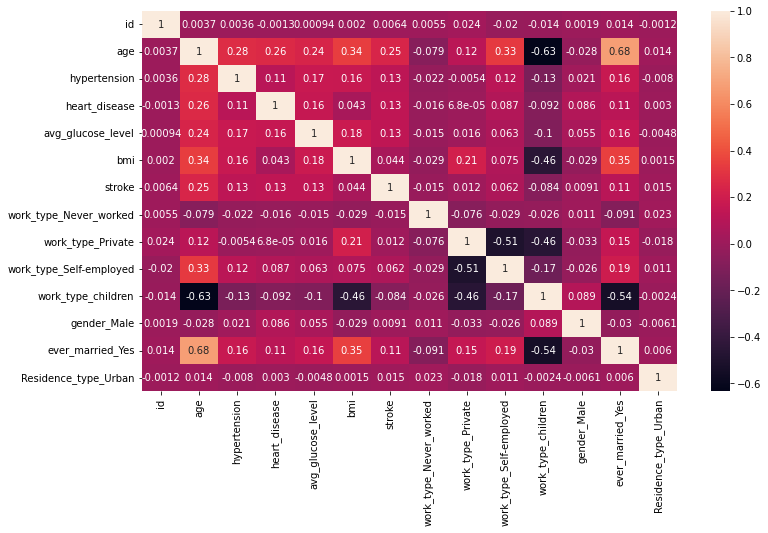

In [222]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True)